In [1]:
import pandas as pd
import torch
import numpy as np

from sklearn.model_selection import train_test_split
from utils.covariate_data_processing import pbc2_proccess_covariate, padded_mask_processing

In [2]:
df = pd.read_csv(
    "/Users/davidlee/Documents/GitHub/Surtimesurvival/Data Project/Pycox Lib/PBC2 Convariate Data/pbc2_data_proccessed_auton_covariate.csv")

In [3]:
df.head()

,event,time,seq_id,seq_time_id,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0,1.095170,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,1,5.319790,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,1,6.261636,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,1,7.266455,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,...,0,1,0,1,0,0,1,0,1,0


In [4]:
df_temp = df.loc[0:, ['seq_id', 'seq_time_id', 'event', 'time']]
df = df.drop(columns=['seq_id', 'seq_time_id'])

In [5]:
df.head()

,event,time,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,3.281890,1.169016e-16,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,2.015877,-4.694608e-01,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,0.172710,-6.589138e-01,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,-0.013468,-6.036567e-01,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,0.098239,1.169016e-16,...,0,1,0,1,0,0,1,0,1,0


In [6]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [7]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

26.0
______
8
______
13
______
21
______
26
______
[2.73792575e-03 3.83309605e-02 1.86178951e-01 4.73661154e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [8]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [9]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [10]:
padded_patients.shape

torch.Size([312, 16, 21])

In [11]:
masks.shape

torch.Size([312, 16])

In [12]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [13]:
df_y_train.head()

,duration,event,proportion
0,3,1.0,0.006928
1,3,0.0,0.988915
2,3,1.0,0.019002
3,2,1.0,0.314286
4,3,0.0,0.263658


In [14]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [15]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [16]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [17]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [18]:
Y_labels

tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [19]:
import torch
from torch.utils.data import TensorDataset

X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(X_features_data_tensor, Y_labels, masks,
                                                                          test_size=0.3)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)

In [20]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# Hyperparameters
# input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [21]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [22]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 5
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 1/40, Training Loss: 1.038356410605567, Validation Loss: 4.730895539124806, Validation Accuracy: 0.7127659574468085
Epoch 2/40, Training Loss: 0.9615440177065986, Validation Loss: 4.432320773601532, Validation Accuracy: 0.7340425531914894


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 3/40, Training Loss: 0.9928227641752788, Validation Loss: 4.232880473136902, Validation Accuracy: 0.7659574468085106
Epoch 4/40, Training Loss: 0.9428165331482887, Validation Loss: 4.071701486905416, Validation Accuracy: 0.776595744680851


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 5/40, Training Loss: 0.9206836223602295, Validation Loss: 4.467085421085358, Validation Accuracy: 0.723404255319149
Epoch 6/40, Training Loss: 0.8626693253006253, Validation Loss: 3.9729631741841636, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 7/40, Training Loss: 0.8676510485155242, Validation Loss: 4.381814340750377, Validation Accuracy: 0.7446808510638298
Epoch 8/40, Training Loss: 0.8877298182674817, Validation Loss: 3.8569652835528054, Validation Accuracy: 0.8297872340425532


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 9/40, Training Loss: 0.8586219144718987, Validation Loss: 4.073119640350342, Validation Accuracy: 0.7872340425531915
Epoch 10/40, Training Loss: 0.8315571440117699, Validation Loss: 4.028878490130107, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 11/40, Training Loss: 0.894796439579555, Validation Loss: 4.531497081120809, Validation Accuracy: 0.7340425531914894
Epoch 12/40, Training Loss: 0.8942440812076841, Validation Loss: 4.004557092984517, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 13/40, Training Loss: 0.842870719730854, Validation Loss: 3.7326784332593284, Validation Accuracy: 0.8404255319148937
Epoch 14/40, Training Loss: 0.8029892050794193, Validation Loss: 4.117347598075867, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 15/40, Training Loss: 0.8386769890785217, Validation Loss: 3.834801276524862, Validation Accuracy: 0.8191489361702128
Epoch 16/40, Training Loss: 0.7946819375668254, Validation Loss: 3.698358714580536, Validation Accuracy: 0.8404255319148937


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 17/40, Training Loss: 0.8161885568073818, Validation Loss: 3.789844810962677, Validation Accuracy: 0.8085106382978723
Epoch 18/40, Training Loss: 0.8448809970702443, Validation Loss: 4.144101063410441, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 19/40, Training Loss: 0.8314923622778484, Validation Loss: 3.739286462465922, Validation Accuracy: 0.8191489361702128
Epoch 20/40, Training Loss: 0.7611030084746224, Validation Loss: 4.075588325659434, Validation Accuracy: 0.776595744680851


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 21/40, Training Loss: 0.7692620658448764, Validation Loss: 3.9155473907788596, Validation Accuracy: 0.8191489361702128
Epoch 22/40, Training Loss: 0.7238357301269259, Validation Loss: 3.6097071369489035, Validation Accuracy: 0.851063829787234


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 23/40, Training Loss: 0.7371570287006242, Validation Loss: 3.608584980169932, Validation Accuracy: 0.8617021276595744
Epoch 24/40, Training Loss: 0.7253639133913177, Validation Loss: 3.521926780541738, Validation Accuracy: 0.8404255319148937


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 25/40, Training Loss: 0.7230838739446231, Validation Loss: 3.7154860893885293, Validation Accuracy: 0.8297872340425532
Epoch 26/40, Training Loss: 0.7420825862458774, Validation Loss: 3.6873532931009927, Validation Accuracy: 0.8191489361702128


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 27/40, Training Loss: 0.7524317683918136, Validation Loss: 3.9890423019727073, Validation Accuracy: 0.7978723404255319
Epoch 28/40, Training Loss: 0.7059411853551865, Validation Loss: 3.6735031803448996, Validation Accuracy: 0.8404255319148937
Epoch 29/40, Training Loss: 0.6920717401163918, Validation Loss: 3.8935853838920593, Validation Accuracy: 0.7978723404255319
Epoch 30/40, Training Loss: 0.8811896017619542, Validation Loss: 3.926992138226827, Validation Accuracy: 0.7978723404255319
Early stopping triggered. No improvement in validation loss for 5 consecutive epochs.


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [23]:
torch.save(model.state_dict(), 'pre_trained_timevisit.pth')

In [24]:
from model.survtimesurvival_model import TransformerClassifier_2

In [25]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pre_trained_timevisit.pth')
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [26]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [27]:
new_embedding = []
for i in range(len(masks)):
    a = masks[i].unsqueeze(0)
    output = model(X_features_data_tensor[i], a)
    new_embedding.append(output)

In [28]:
# Convert each tensor to a numpy array and stack them
numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [29]:
new_df = pd.DataFrame(numpy_array[0])
new_df = new_df.transpose()

In [30]:
dataframe_for_survtrace = pd.concat([new_df, df_y_train],axis = 1)

In [31]:
dataframe_for_survtrace.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,duration,event,proportion
0,1.286464,-1.421795,-1.299452,-0.625410,2.219835,1.582592,-2.233264,-1.730985,-1.802970,-0.505439,...,-1.679285,-2.681103,-1.763088,-1.080499,-1.706737,1.882329,1.273232,3,1.0,0.006928
1,0.614591,-0.306701,-0.822174,0.444253,0.812576,0.294166,-0.789691,-0.595950,-0.190587,-0.224293,...,-0.187613,-0.618839,-0.285169,-0.828994,-0.467790,0.310085,0.561479,3,0.0,0.988915
2,1.019589,-1.024328,-1.073959,-0.187117,1.716057,1.157260,-1.792654,-1.237300,-1.207900,-0.314086,...,-1.103845,-2.031368,-1.238092,-0.998694,-1.155553,1.299024,0.991184,3,1.0,0.019002
3,1.308317,-1.328414,-1.397077,-0.426731,2.024359,1.310069,-1.949987,-1.570794,-1.520941,-0.627531,...,-1.454246,-2.161298,-1.496655,-1.156322,-1.716852,1.572332,1.255388,2,1.0,0.314286
4,1.286725,-1.392414,-1.373620,-0.499747,2.080608,1.367680,-1.953835,-1.608385,-1.645382,-0.596136,...,-1.526334,-2.269053,-1.616772,-1.132502,-1.779256,1.704109,1.287120,3,0.0,0.263658


In [32]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [33]:
dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis = 1)

In [34]:
dataframe_for_survtrace.rename(columns = {'proportion':'proportion_1'}, inplace = True)
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [35]:
df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
df_2.rename(columns = {'seq_time_id':'duration'}, inplace = True)

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         312 non-null    float32
 1   1         312 non-null    float32
 2   2         312 non-null    float32
 3   3         312 non-null    float32
 4   4         312 non-null    float32
 5   5         312 non-null    float32
 6   6         312 non-null    float32
 7   7         312 non-null    float32
 8   8         312 non-null    float32
 9   9         312 non-null    float32
 10  10        312 non-null    float32
 11  11        312 non-null    float32
 12  12        312 non-null    float32
 13  13        312 non-null    float32
 14  14        312 non-null    float32
 15  15        312 non-null    float32
 16  16        312 non-null    float32
 17  17        312 non-null    float32
 18  18        312 non-null    float32
 19  19        312 non-null    float32
 20  20        312 non-null    float3

In [37]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [38]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(df_2)

0
______
21
______
0
______
21
______
0
______
[ 0.11225496  2.06987187  3.72357902  6.68738364 14.30566203]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [39]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [40]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=16,
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/train_utils.py:216: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 20.437318325042725
[Val-0]: 4.739011287689209
[Train-1]: 15.733764886856079
[Val-1]: 3.1450846195220947
[Train-2]: 11.668456494808197
[Val-2]: 1.4162561893463135
[Train-3]: 8.205980896949768
[Val-3]: 1.152697205543518
[Train-4]: 7.445231348276138
[Val-4]: 1.3312873840332031
EarlyStopping counter: 1 out of 5
[Train-5]: 7.333727836608887
[Val-5]: 1.398810625076294
EarlyStopping counter: 2 out of 5
[Train-6]: 7.266866743564606
[Val-6]: 1.2565679550170898
EarlyStopping counter: 3 out of 5
[Train-7]: 6.5302664488554
[Val-7]: 1.1193175315856934
[Train-8]: 6.641612529754639
[Val-8]: 1.299363374710083
EarlyStopping counter: 1 out of 5
[Train-9]: 5.638150170445442
[Val-9]: 1.9618579149246216
EarlyStopping counter: 2 out of 5
[Train-10]: 6.38570511341095
[Val-10]: 1.3974486589431763
EarlyStopping counter: 3 out of 5
[Train-11]: 5.95444443821907
[Val-11]: 1.8837546110153198
EarlyStopping counter: 4 out of 5
[Train-12]: 6.330798506736755
[Val-12]: 1.5341719388961792
EarlyStopping counte

In [41]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.8961828968395285
Brier Score: 0.15169992921823733
For 0.5 quantile,
TD Concordance Index - IPCW: 0.8513948878225556
Brier Score: 0.1393725146083071
For 0.75 quantile,
TD Concordance Index - IPCW: 0.8738657851777605
Brier Score: 0.21566299900084457
done


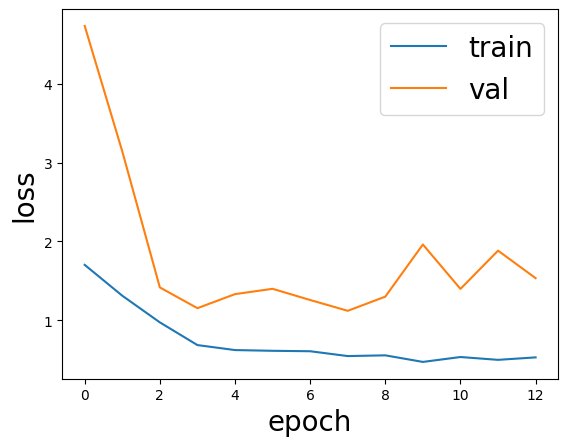

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()